In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

import keras as k
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

import os

In [53]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [54]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


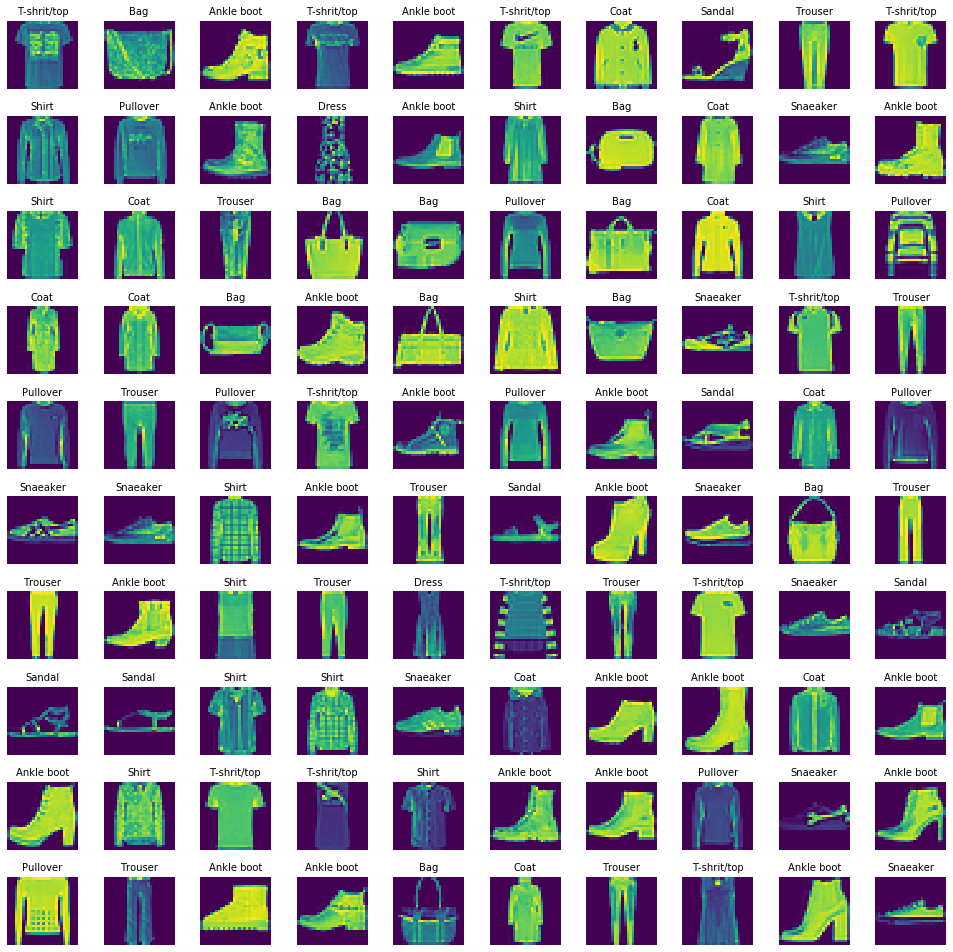

In [55]:
# Define the labels of the dataset
labels = ['T-shrit/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Snaeaker', 'Bag', 'Ankle boot']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 10)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [56]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print(f'shape of X train : {X_train.shape}')
print(f'shape of X test : {X_test.shape}')

shape of X train : (60000, 28, 28)
shape of X test : (10000, 28, 28)


In [57]:
y_testo = y_test
print(f'shape of Y testo : {y_testo.shape}')

shape of Y testo : (10000,)


In [58]:
y_cat_train = to_categorical(y_train, num_classes = 10)
y_cat_test = to_categorical(y_test, num_classes = 10)
print(f'shape of Y train : {y_cat_train.shape}')
print(f'shape of Y test : {y_cat_test.shape}')
print(f'shape of Y testo : {y_testo.shape}')


shape of Y train : (60000, 10)
shape of Y test : (10000, 10)
shape of Y testo : (10000,)


In [118]:
model = Sequential()
batch_size = 64
num_classes = 10
epochs = 10

model.add(Conv2D(32, kernel_size=5, activation='relu', input_shape = (28,28,1)))
model.add(Conv2D(64, 5, activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))
model.add(Conv2D(128, 5, activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [108]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling build() or calling fit() with some data. Or specify input_shape or batch_input_shape in the first layer for automatic build. 

In [100]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1, 
                            height_shift_range = 0.1)

X_train = X_train.reshape((60000, 28, 28, 1))
y_train = y_train.reshape((60000, 1))
X_test = X_test.reshape((10000, 28, 28, 1))
y_test = y_test.reshape((10000, 1))

datagen.fit(X_train)

In [102]:
model.fit(X_train, y_cat_train, batch_size=batch_size, epochs=epochs,validation_data = (X_test, y_cat_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/13
60000/60000 [==============================] - 132s 2ms/step - loss: 0.4848 - accuracy: 0.8210 - val_loss: 0.3796 - val_accuracy: 0.8585
Epoch 2/13
60000/60000 [==============================] - 131s 2ms/step - loss: 0.3547 - accuracy: 0.8701 - val_loss: 0.3032 - val_accuracy: 0.8867
Epoch 3/13
60000/60000 [==============================] - 131s 2ms/step - loss: 0.3071 - accuracy: 0.8868 - val_loss: 0.2845 - val_accuracy: 0.8964
Epoch 4/13
60000/60000 [==============================] - 132s 2ms/step - loss: 0.2872 - accuracy: 0.8951 - val_loss: 0.2779 - val_accuracy: 0.8967
Epoch 5/13
60000/60000 [==============================] - 132s 2ms/step - loss: 0.2644 - accuracy: 0.9030 - val_loss: 0.2580 - val_accuracy: 0.9033
Epoch 6/13
60000/60000 [==============================] - 131s 2ms/step - loss: 0.2495 - accuracy: 0.9088 - val_loss: 0.2496 - val_accuracy: 0.9059
Epoch 7/13
60000/60000 [==============================] - 132s

In [104]:
model_history = pd.DataFrame(model.history.history)

model_history

,val_loss,val_accuracy,loss,accuracy
0,0.379561,0.8585,0.484783,0.820967
1,0.303178,0.8867,0.354678,0.870067
2,0.284504,0.8964,0.307149,0.886767
3,0.277915,0.8967,0.287220,0.895133
4,0.257989,0.9033,0.264389,0.902967
5,0.249597,0.9059,0.249483,0.908767
6,0.239772,0.9099,0.237257,0.912583
7,0.237772,0.9118,0.229554,0.916317
8,0.235608,0.9146,0.219383,0.919033
9,0.236082,0.9156,0.210092,0.921333


In [1]:
model_history[['accuracy','val_accuracy']].plot()

NameError: name 'model_history' is not defined

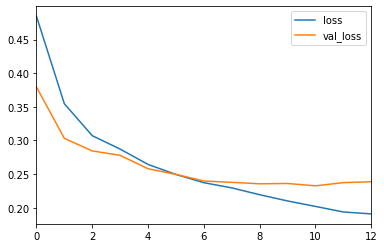

In [106]:
model_history[['loss','val_loss']].plot()

In [66]:
predict_class = model.predict_classes(X_test)
predict_class.shape

(10000,)

In [67]:
y_testo.shape

(10000,)

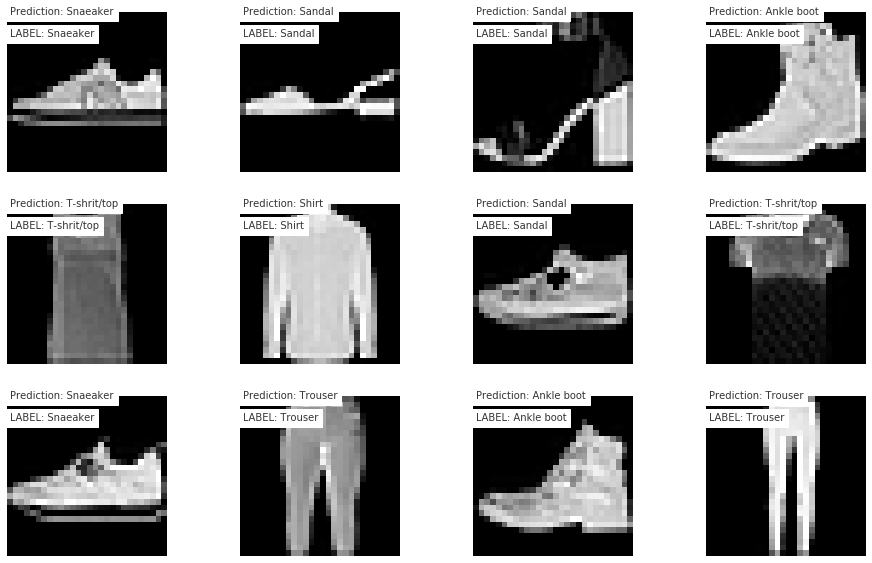

In [79]:
name = {0:'T-shrit/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Snaeaker', 8:'Bag', 9:'Ankle boot'}

R = 3
C = 4
fig, axes = plt.subplots(R,C, figsize=(16,10))

for i in range(R):
    for j in range(C):
        r = np.random.randint(10000, size=1)[0]
        axes[i, j].imshow(X_test[r].reshape(28,28), cmap = 'gray')
        axes[i, j].plot()
        #print('this is a', name[y_testo[r][0]], '-------- prediction is:', name[predicto[r]])
        axes[i, j].text(0, 0, 'Prediction: %s' % name[int(predict_class[r])], color='k', backgroundcolor='w', alpha=0.8)
        axes[i, j].text(0, 3.9, 'LABEL: %s' % name[int(y_testo[r])], color='k', backgroundcolor='w', alpha=0.8)
        axes[i, j].axis('off')-
        